# <center><b>ROAD</b></center>

# <center><b>CLASSIFICATION</b></center>

![road.jpg](attachment:road.jpg )
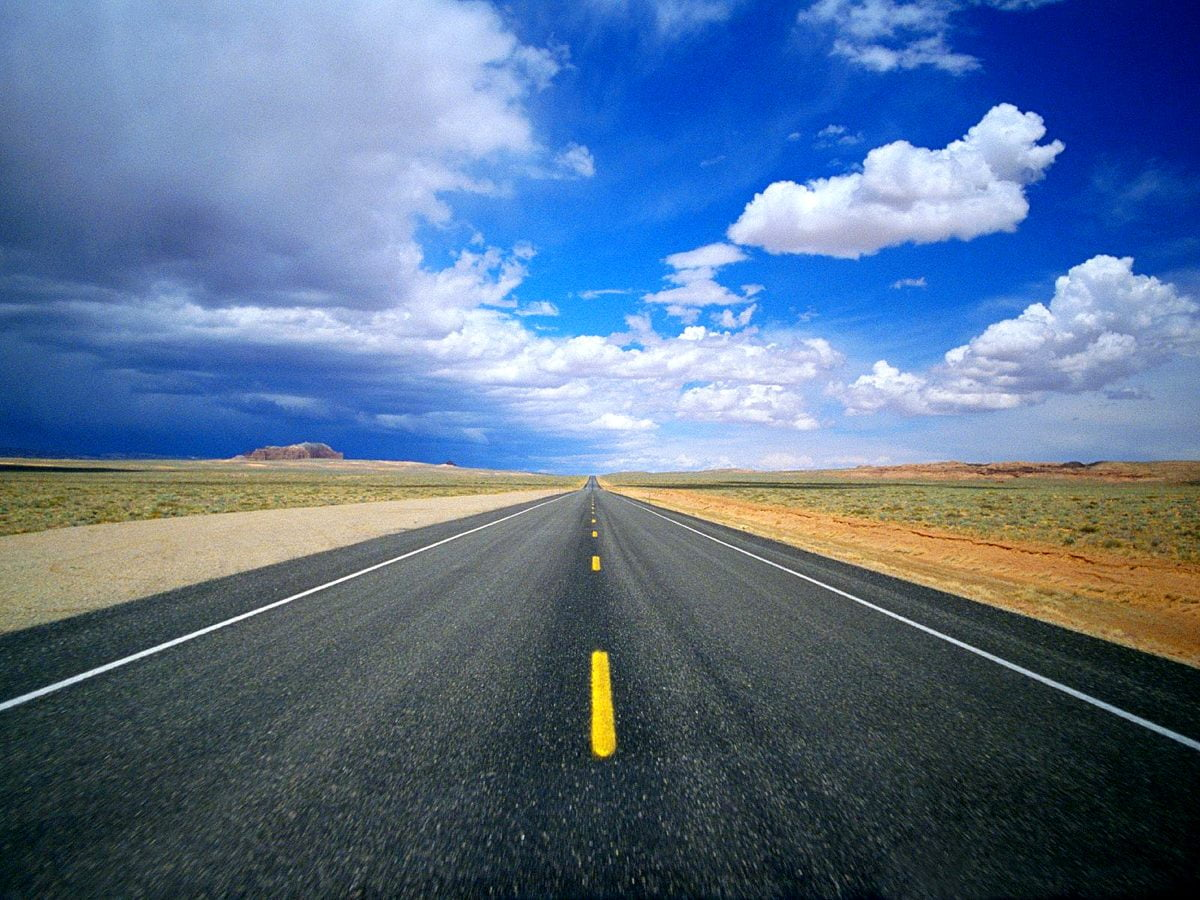

<center>The task is to create a classification model, which can accurately classify if a road is clean or littered</center>

### Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import cv2
import tensorflow as tf
import keras
from keras.layers import Dense, MaxPooling2D, Conv2D, BatchNormalization, Dropout, Input, Flatten
from keras.models import Sequential, Model
from keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from random import randint

In [2]:
# meta/images paths
meta_file= r"C:\Users\DELL\Downloads\archive (1)\metadata.csv"
IMAGE_PATH = r'C:\Users\DELL\Downloads\archive (1)\Images/Images/'


In [3]:
# load meta
df = pd.read_csv(meta_file)
# creating column for filepath of every image in the dataset
df['filepath'] = df['filename'].map(lambda x:  os.path.join(IMAGE_PATH,x))

In [4]:
df.head()

,filename,label,filepath
0,dirty_2.jpg,1,C:\Users\DELL\Downloads\archive (1)\Images/Ima...
1,clean_36.jpg,0,C:\Users\DELL\Downloads\archive (1)\Images/Ima...
2,clean_31.jpg,0,C:\Users\DELL\Downloads\archive (1)\Images/Ima...
3,dirty_69.jpg,1,C:\Users\DELL\Downloads\archive (1)\Images/Ima...
4,clean_113.jpg,0,C:\Users\DELL\Downloads\archive (1)\Images/Ima...


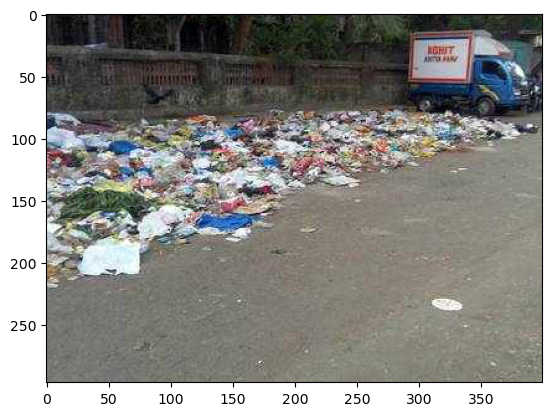

In [5]:
plt.imshow(plt.imread(df['filepath'][0]));

#### Visualization

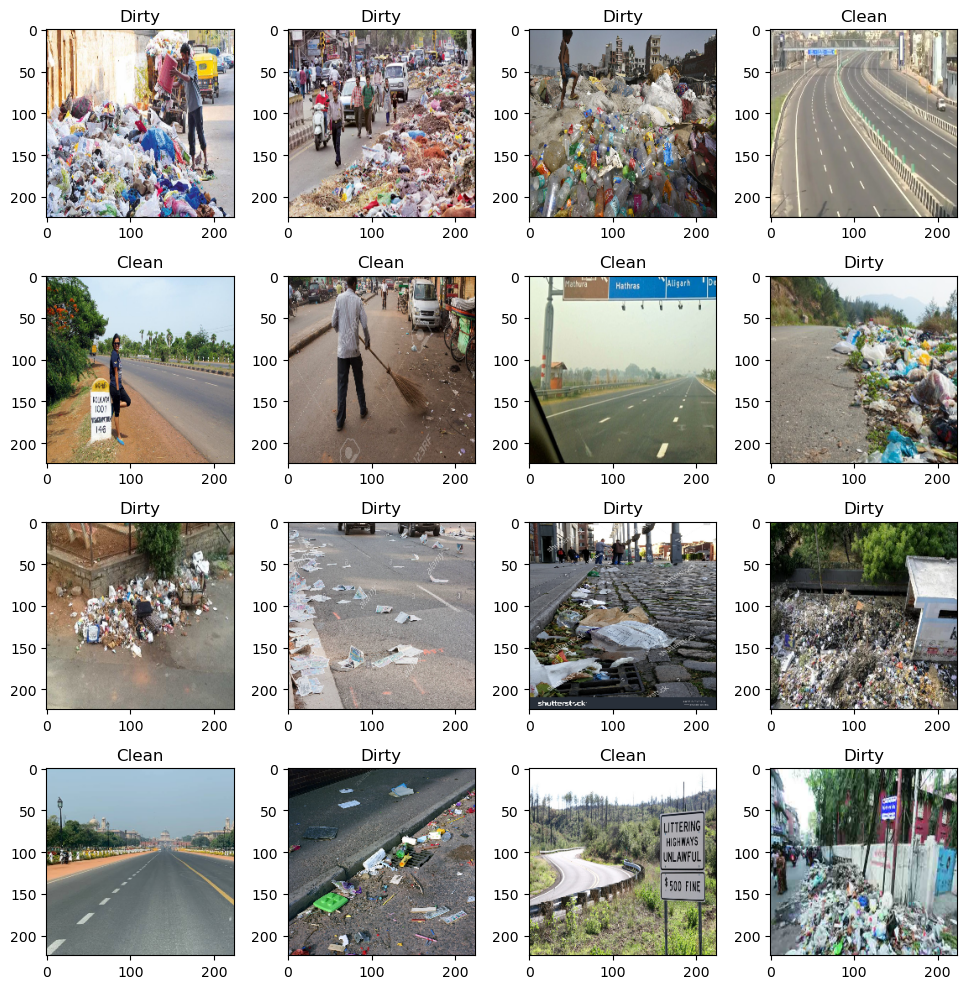

In [6]:
plt.figure(figsize = (10,10))
for val in range(16):
    i = random.randint(0,len(df))
    plt.subplot(4, 4, val + 1)
    image = plt.imread(df['filepath'][i])
    image = cv2.resize(image, (224, 224))
    label = df['label'][i]
    plt.title("Clean" if label == 0 else "Dirty")
    plt.axis()
    plt.tight_layout()
    plt.imshow(image)
    
    

In [7]:
df['label'] = df['label'].astype(str)#

In [8]:
num_classes = df['label'].nunique()
num_classes

2

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2, random_state=42) 

In [10]:
IMG_SHAPE = 400
BATCH_SIZE = 16

In [11]:
train_gen=ImageDataGenerator(rescale=1/255.,
                        brightness_range=[0.4,1.4],
                        rotation_range =10 ,
                        zoom_range = 0.1,
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        horizontal_flip=True)

test_gen=ImageDataGenerator(rescale=1/255.)

In [12]:
train_df = train_gen.flow_from_dataframe(
            train, 
            target_size =(224,224), 
            x_col='filepath',
            y_col='label',
            batch_size= BATCH_SIZE, 
            class_mode="categorical" ,
            color_mode = 'rgb',
            shuffle = True
            )

test_df = test_gen.flow_from_dataframe(
            test,
            color_mode = 'rgb',
            target_size = (224,224), 
            shuffle = True,
            x_col='filepath',y_col='label',
            batch_size= BATCH_SIZE,
            class_mode="categorical" 
            )
        

Found 189 validated image filenames belonging to 2 classes.
Found 48 validated image filenames belonging to 2 classes.


The amount of data for this project is very small. It might give poor results at the end of training. One solution to data deficiency is augmentation and I have augmented the dataset. A pretrained model might be the best model to use for this project.

In [17]:
#Creating my CNN

model = Sequential()

model.add(Conv2D(16,kernel_size  = (3,3), strides = 1, padding = 'same', activation = 'relu',input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
  
model.add(Conv2D(64, kernel_size  = (3,3), strides = 1, padding = 'same', activation = 'relu'))
model.add(Conv2D(64, kernel_size  = (3,3), strides = 1, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size  = (3,3), strides = 1, padding = 'same', activation = 'relu'))
model.add(Conv2D(128, kernel_size  = (3,3), strides = 1, padding = 'same', activation = 'relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D())
# model.add(Dropout(0.5))
          
model.add(Conv2D(256, kernel_size = (3,3), strides = 1, padding = 'same', activation = 'relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

In [18]:
model.compile(loss = "categorical_crossentropy", optimizer = Adam(learning_rate = 0.0001), metrics = ['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 batch_normalization_2 (Batc  (None, 224, 224, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 64)      9280      
                                                                 
 conv2d_8 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 batch_normalization_3 (Batc  (None, 112, 112, 64)    

In [20]:

hisory = model.fit(train_df, validation_data = test_df,
         epochs = 15,
         steps_per_epoch = len(train)// BATCH_SIZE)

Epoch 1/15
11/11 [==============================] - 42s 4s/step - loss: 1.2818 - accuracy: 0.5549 - val_loss: 0.6934 - val_accuracy: 0.4375
Epoch 2/15
11/11 [==============================] - 42s 4s/step - loss: 0.6997 - accuracy: 0.5376 - val_loss: 0.6921 - val_accuracy: 0.5417
Epoch 3/15
11/11 [==============================] - 42s 4s/step - loss: 0.6233 - accuracy: 0.6763 - val_loss: 0.6906 - val_accuracy: 0.7500
Epoch 4/15
11/11 [==============================] - 43s 4s/step - loss: 0.5797 - accuracy: 0.7168 - val_loss: 0.6883 - val_accuracy: 0.5625
Epoch 5/15
11/11 [==============================] - 45s 4s/step - loss: 0.6061 - accuracy: 0.6763 - val_loss: 0.6867 - val_accuracy: 0.5625
Epoch 6/15
11/11 [==============================] - 47s 4s/step - loss: 0.5483 - accuracy: 0.6936 - val_loss: 0.6832 - val_accuracy: 0.5625
Epoch 7/15
11/11 [==============================] - 42s 4s/step - loss: 0.5170 - accuracy: 0.7514 - val_loss: 0.6819 - val_accuracy: 0.5625
Epoch 8/15
11/11 [==

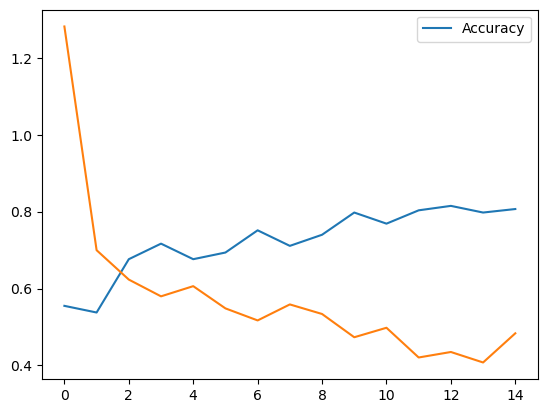

In [21]:
plt.plot(hisory.history['accuracy'], label = 'Accuracy')
plt.legend({'Accuracy'})
plt.plot(hisory.history['loss'], label = 'loss')

The result can be improved, let me try to see what difference it would make if i use a pre-trained model

In [22]:
model.evaluate(test_df)[1]

3/3 [==============================] - 4s 1s/step - loss: 0.6583 - accuracy: 0.6042


[0.6583170294761658, 0.6041666865348816]

### Using a pretrained model

In [23]:
from keras.applications.mobilenet import MobileNet

In [24]:
base_model = MobileNet(weights = 'imagenet', input_shape = (224,224,3), include_top = False)

base_model.trainable = True

In [25]:
#training about 30% of the architecture and freezing the other 70%

n = int(0.70 * len(base_model.layers))
for i in range(n):
    base_model.layers[i].trainable = False
    

In [26]:
def make_model():
    inp = Input(shape = (224,224,3))
    x = base_model(inp)
    x = Dropout(0.2)(x)
    x = Conv2D(256, (3,3), activation = 'relu')(x)
    x = MaxPooling2D(2)(x)
    x = Dropout(0.2)(x)
    x = Flatten()(x)
    x = Dense(256, activation = 'relu')(x)
    x = Dropout(0.2)(x)
    out = Dense(2, activation = 'softmax')(x)
    
    model = Model(inputs = inp, outputs = out)
    return model

In [27]:
model = make_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 1024)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 5, 5, 256)         2359552   
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 256)        0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 2, 2, 256)         0     

In [28]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
hisory = model.fit(train_df, validation_data = test_df,
         epochs = 15,
         steps_per_epoch = len(train)// BATCH_SIZE)

Epoch 1/15
11/11 [==============================] - 28s 2s/step - loss: 3.8003 - accuracy: 0.7341 - val_loss: 2.6069 - val_accuracy: 0.7500
Epoch 2/15
11/11 [==============================] - 24s 2s/step - loss: 0.8742 - accuracy: 0.9318 - val_loss: 0.5603 - val_accuracy: 0.8958
Epoch 3/15
11/11 [==============================] - 23s 2s/step - loss: 0.1609 - accuracy: 0.9711 - val_loss: 1.0658 - val_accuracy: 0.8333
Epoch 4/15
11/11 [==============================] - 21s 2s/step - loss: 0.0628 - accuracy: 0.9827 - val_loss: 0.3440 - val_accuracy: 0.9583
Epoch 5/15
11/11 [==============================] - 22s 2s/step - loss: 0.0651 - accuracy: 0.9769 - val_loss: 0.2169 - val_accuracy: 0.9792
Epoch 6/15
11/11 [==============================] - 20s 2s/step - loss: 0.0335 - accuracy: 0.9942 - val_loss: 0.0855 - val_accuracy: 0.9792
Epoch 7/15
11/11 [==============================] - 24s 2s/step - loss: 0.0169 - accuracy: 0.9884 - val_loss: 0.1731 - val_accuracy: 0.9792
Epoch 8/15
11/11 [==

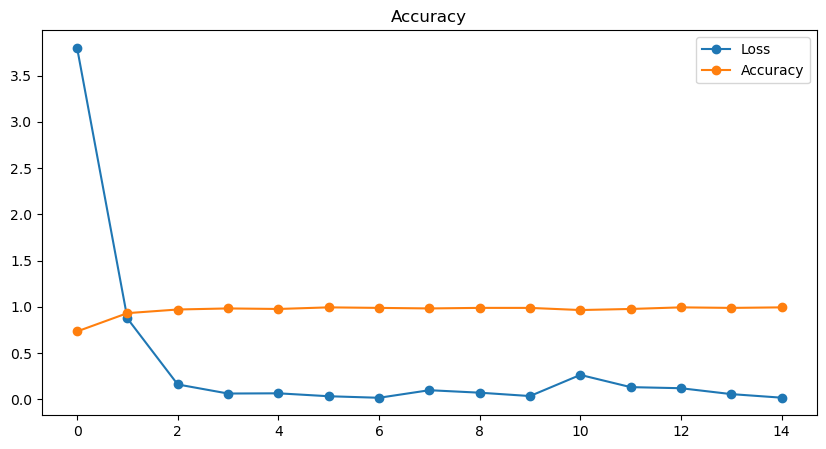

In [30]:
plt.figure(figsize = (10, 5))

# plt.subplot(1,2,1)
plt.title('Loss')
plt.plot(hisory.history['loss'], marker = 'o', label = 'Loss')
plt.legend()

# plt.subplot(1,2,2)
plt.title('Accuracy')
plt.plot(hisory.history['accuracy'], marker = 'o', label = 'Accuracy')
plt.legend()
plt.show()

The model was able to converge at a good accuracy range of 0.95-0.99

In [31]:
model.evaluate(test_df)[1]

3/3 [==============================] - 4s 898ms/step - loss: 0.1052 - accuracy: 0.9583


0.9583333134651184

In [32]:
clean_road_image = plt.imread(r"C:\Users\DELL\Pictures\clean_road.jpg")

In [33]:
def image_processor(image):
    image = cv2.resize(image, (224,224))
    image = image/255.0
    plt.imshow(image)
    image = image.reshape(-1,224,224,3)
    return image

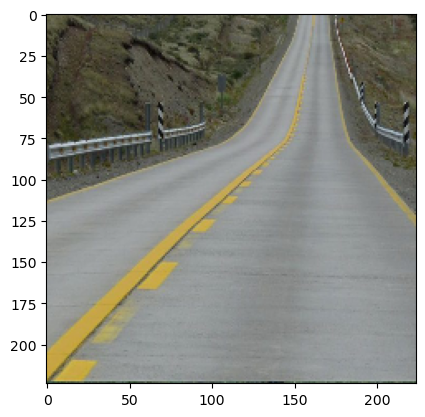

In [34]:
image1 = image_processor(clean_road_image)

In [35]:
model.predict(image1)

1/1 [==============================] - 1s 1s/step


array([[9.9999952e-01, 4.4730285e-07]], dtype=float32)

Excellent, it accurately predicted that this is a clean road without any doubt

In [36]:
dirty_road_image = plt.imread(r"C:\Users\DELL\Pictures\dirty_road.jpg")

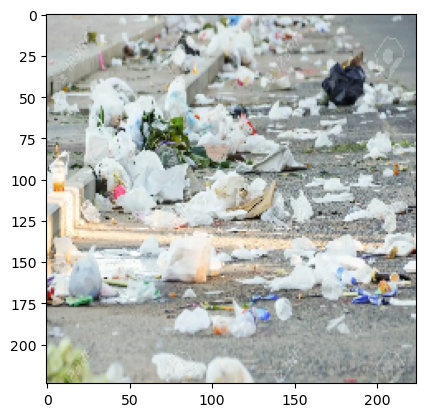

In [37]:
image2 = image_processor(dirty_road_image)

In [38]:
model.predict(image2)

1/1 [==============================] - 0s 81ms/step


array([[3.1848138e-15, 1.0000000e+00]], dtype=float32)

It also gave a very accurate prediction for the dirty road